Student Name: Cormac Lavery

Student ID: 16139658

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [720]:
%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [721]:
a_x = 0.05
a_y= 10

In [722]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [723]:
data.shape

(20, 2)

In [724]:
class MyPCA:

    def __init__(self, n_components = 2):
        self.n_components = n_components


    def fit(self, matrix):
        # subtract the mean of each column from the column
        self.mean = mean_data = np.mean(data, axis=0)
        centered_data = data - self.mean
        #calculate the covariance of the data with mean subtracted
        cov_data = np.cov(centered_data,rowvar=False)
        values, vectors = eig(cov_data)        
        #(square each value so that magnitude and not sign is taken into account when ordering)
        sorted_eigen_values_indexes = np.square(values).argsort()[::-1]
        sorted_eigen_values = values[sorted_eigen_values_indexes]
        sorted_eigen_vectors = vectors[sorted_eigen_values_indexes]
        self.eigen_values = sorted_eigen_values[:self.n_components]
        self.eigen_vectors = sorted_eigen_vectors.T[:self.n_components,:]
        
    def transform(self, matrix):
        matrix = matrix - self.mean
        return np.dot(matrix, self.eigen_vectors.T)    
        

In [725]:
scikit_pca = PCA(n_components=2)
scikit_pca.fit(data)
scikit_transform = scikit_pca.transform(data)
scikit_pca_eigen_vectors = scikit_pca.components_
scikit_pca_eigen_values = scikit_pca.explained_variance_


my_pca = MyPCA(n_components=2)
my_pca.fit(data)
my_pca_transform = my_pca.transform(data)
my_pca_eigen_vectors = my_pca.eigen_vectors
my_pca_eigen_values = my_pca.eigen_values

print("my pca eigen vectors: \n{}".format(my_pca_eigen_vectors))
print("scikit pca eigen values: \n{}".format(scikit_pca_eigen_values))
print()
print()
print("scikit pca eigen vectors: \n{}".format(scikit_pca_eigen_vectors))
print("my pca eigen values: \n{}".format(my_pca_eigen_values))
print()
print("my pca transform: \n{}".format(my_pca_transform))
print("scikit pca transform: \n{}".format(scikit_transform))
print()
print("difference between eigen values: \n{}".format(scikit_pca_eigen_values - my_pca_eigen_values))
print("difference between eigen vectors: \n{}".format(scikit_pca_eigen_vectors - my_pca_eigen_vectors))
print("difference between transforms: \n{}".format(scikit_transform - my_pca_transform))


my pca eigen vectors: 
[[ 0.23853209 -0.97113462]
 [-0.97113462 -0.23853209]]
scikit pca eigen values: 
[6.12341764e+02 5.81909796e-01]


scikit pca eigen vectors: 
[[-0.23853209 -0.97113462]
 [-0.97113462  0.23853209]]
my pca eigen values: 
[6.12341764e+02 5.81909796e-01]

my pca transform: 
[[ 38.617628    19.30742543]
 [ 28.62711273  15.82127047]
 [ 30.75150454  15.36357681]
 [ 18.52818251  11.22879218]
 [ 20.48578302  10.69016411]
 [ 20.26897047   9.68847676]
 [ 17.16642501   7.7505929 ]
 [  5.57264243   3.81572082]
 [  1.1092926    1.67491862]
 [ -0.47881358   0.63302412]
 [ -1.7985529   -0.6898071 ]
 [ -9.68138316  -3.93188813]
 [ -5.48704882  -3.89391294]
 [-12.63825826  -6.64389918]
 [-16.51957623  -8.52349112]
 [-17.25608456 -10.16737284]
 [-22.95581787 -12.54877563]
 [-26.78171266 -14.50327205]
 [-33.38950524 -16.97228009]
 [-34.14078803 -18.09926314]]
scikit pca transform: 
[[ 4.31681360e+01 -7.80963103e-01]
 [ 3.26993795e+01  7.58130586e-01]
 [ 3.43699794e+01 -6.31696775e-0

My eigen values match however I note that the eigen vectors do not match for my PCA class and the scikit implementation. My transform also does not match the scikit PCA transform.

The magnitude match but the signs do not. I found the following stack overflow on someone else who had the same issue.
https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative

The answer seems to be that although the sign is different it is not the signs that we are interested in but the plance that the components lie on. In the following chart I will show that the resulting components are either in the same of directly opposite directions

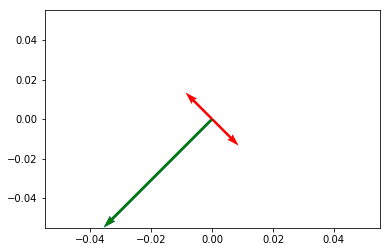

In [727]:
V = scikit_pca_eigen_vectors
W = my_pca_eigen_vectors
origin = [0], [0] # origin point




plt.quiver(*origin, W, V, color=['r','b','g'], scale=3)

plt.show()


In the following script I show that my transform function is calculating the values correctly by manually changing the eigen vectors in my PCA to the ones caclulated by the scikit PCA.

In [729]:
my_pca.eigen_vectors = scikit_pca_eigen_vectors
test_transform = my_pca.transform(data)
print("scikit pca transform: \n{}\n".format(scikit_transform))
print("my pca transform with scikit eigen vectors: \n{}\n".format(test_transform))
print("new difference between transforms: \n{}\n".format(scikit_transform - test_transform))

scikit pca transform: 
[[ 4.31681360e+01 -7.80963103e-01]
 [ 3.26993795e+01  7.58130586e-01]
 [ 3.43699794e+01 -6.31696775e-01]
 [ 2.16219927e+01  1.36702309e+00]
 [ 2.31072849e+01 -1.72554114e-02]
 [ 2.24510693e+01 -8.04507783e-01]
 [ 1.88037693e+01 -1.08448063e+00]
 [ 6.70630174e+00  7.99741148e-01]
 [ 1.75903950e+00  9.70392959e-01]
 [-1.31050939e-01  7.82820304e-01]
 [-1.91346954e+00  2.21947532e-01]
 [-1.04013074e+01  1.00086387e+00]
 [-6.66667418e+00 -9.08690357e-01]
 [-1.42781618e+01 -3.26324175e-02]
 [-1.85886075e+01  9.98535863e-02]
 [-2.00029046e+01 -1.01574286e+00]
 [-2.61573246e+01 -4.85503982e-01]
 [-3.04533568e+01 -4.45075894e-01]
 [-3.74530903e+01  4.28224774e-01]
 [-3.86410048e+01 -2.22448638e-01]]

my pca transform with scikit eigen vectors: 
[[ 4.31681360e+01 -7.80963103e-01]
 [ 3.26993795e+01  7.58130586e-01]
 [ 3.43699794e+01 -6.31696775e-01]
 [ 2.16219927e+01  1.36702309e+00]
 [ 2.31072849e+01 -1.72554114e-02]
 [ 2.24510693e+01 -8.04507783e-01]
 [ 1.88037693e+01 -1